In [1]:
# Import necessary libraries

import numpy as np  # Import numpy for numerical computations
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting

import math
import copy

from sklearn.linear_model import LinearRegression # Import Logistic Regression model
from sklearn.model_selection import train_test_split # Import function for splitting data into train and test sets
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset from the specified file path
ds = pd.read_csv('/kaggle/input/house-prce-predcton/raw_house_prices.csv')

# Display the loaded dataset
ds

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage,Price
0,4,2,2,Urban,4526,6,1,791442.190356
1,5,4,1,Rural,4679,3,0,915653.402909
2,3,4,2,Urban,2182,22,0,501578.036147
3,5,1,2,Suburban,4463,11,1,762375.219812
4,5,2,1,Suburban,1433,15,1,521820.710663
...,...,...,...,...,...,...,...,...
495,1,2,1,Rural,2996,22,0,406441.256676
496,3,3,1,Urban,2225,24,0,460897.138241
497,1,4,1,Suburban,2189,13,1,417818.488330
498,1,3,1,Urban,3767,12,0,578887.797914


In [3]:
# Visualise the data
ds.head()

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage,Price
0,4,2,2,Urban,4526,6,1,791442.190356
1,5,4,1,Rural,4679,3,0,915653.402909
2,3,4,2,Urban,2182,22,0,501578.036147
3,5,1,2,Suburban,4463,11,1,762375.219812
4,5,2,1,Suburban,1433,15,1,521820.710663


In [4]:
ds.tail()

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage,Price
495,1,2,1,Rural,2996,22,0,406441.256676
496,3,3,1,Urban,2225,24,0,460897.138241
497,1,4,1,Suburban,2189,13,1,417818.488330
498,1,3,1,Urban,3767,12,0,578887.797914
499,1,2,2,Urban,4906,26,0,652360.135954


In [5]:
#get all categorical columns
cat_columns = ds.select_dtypes(['object']).columns

#convert all categorical columns to numeric
ds[cat_columns] = ds[cat_columns].apply(lambda x: pd.factorize(x)[0])

# Display the dataset
ds

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage,Price
0,4,2,2,0,4526,6,1,791442.190356
1,5,4,1,1,4679,3,0,915653.402909
2,3,4,2,0,2182,22,0,501578.036147
3,5,1,2,2,4463,11,1,762375.219812
4,5,2,1,2,1433,15,1,521820.710663
...,...,...,...,...,...,...,...,...
495,1,2,1,1,2996,22,0,406441.256676
496,3,3,1,0,2225,24,0,460897.138241
497,1,4,1,2,2189,13,1,417818.488330
498,1,3,1,0,3767,12,0,578887.797914


In [6]:
# Give dataset’s structure and information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rooms        500 non-null    int64  
 1   Bathrooms    500 non-null    int64  
 2   Floors       500 non-null    int64  
 3   Locality     500 non-null    int64  
 4   Area (sqft)  500 non-null    int64  
 5   Age (years)  500 non-null    int64  
 6   Garage       500 non-null    int64  
 7   Price        500 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 31.4 KB


In [7]:
# returns the number of missing values in the dataset
ds.isnull().sum()

Rooms          0
Bathrooms      0
Floors         0
Locality       0
Area (sqft)    0
Age (years)    0
Garage         0
Price          0
dtype: int64

In [8]:
# view statistics of dataset
ds.describe()

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage,Price
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.970000,2.39400,1.484000,0.980000,2734.282000,15.210000,0.516000,559380.184582
std,1.425891,1.11591,0.500244,0.825204,1309.631158,8.316503,0.500244,157841.103495
min,1.000000,1.00000,1.000000,0.000000,501.000000,1.000000,0.000000,176541.684423
25%,2.000000,1.00000,1.000000,0.000000,1541.000000,8.000000,0.000000,446725.721340
50%,3.000000,2.00000,1.000000,1.000000,2754.000000,15.000000,1.000000,556138.342222
75%,4.000000,3.00000,2.000000,2.000000,3881.250000,22.000000,1.000000,671339.774456
max,5.000000,4.00000,2.000000,2.000000,4976.000000,29.000000,1.000000,971124.868891


In [9]:
# view columns
ds.columns

Index(['Rooms', 'Bathrooms', 'Floors', 'Locality', 'Area (sqft)',
       'Age (years)', 'Garage', 'Price'],
      dtype='object')

In [10]:
# Spliting dataset into input and output (i.e x and y)
y = ds.iloc[:, 7]  # 8th column
x = ds.drop(columns=ds.columns[7])

In [11]:
# visualise x and y
x

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage
0,4,2,2,0,4526,6,1
1,5,4,1,1,4679,3,0
2,3,4,2,0,2182,22,0
3,5,1,2,2,4463,11,1
4,5,2,1,2,1433,15,1
...,...,...,...,...,...,...,...
495,1,2,1,1,2996,22,0
496,3,3,1,0,2225,24,0
497,1,4,1,2,2189,13,1
498,1,3,1,0,3767,12,0


In [12]:
y

0      791442.190356
1      915653.402909
2      501578.036147
3      762375.219812
4      521820.710663
           ...      
495    406441.256676
496    460897.138241
497    417818.488330
498    578887.797914
499    652360.135954
Name: Price, Length: 500, dtype: float64

In [13]:
print("First five elements in x are:\n", x[:5])
print("Type of x:",type(x))

First five elements in x are:
    Rooms  Bathrooms  Floors  Locality  Area (sqft)  Age (years)  Garage
0      4          2       2         0         4526            6       1
1      5          4       1         1         4679            3       0
2      3          4       2         0         2182           22       0
3      5          1       2         2         4463           11       1
4      5          2       1         2         1433           15       1
Type of x: <class 'pandas.core.frame.DataFrame'>


In [14]:
# scaling input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [15]:
# convert pandas to numpy ndarray
y = y.to_numpy()

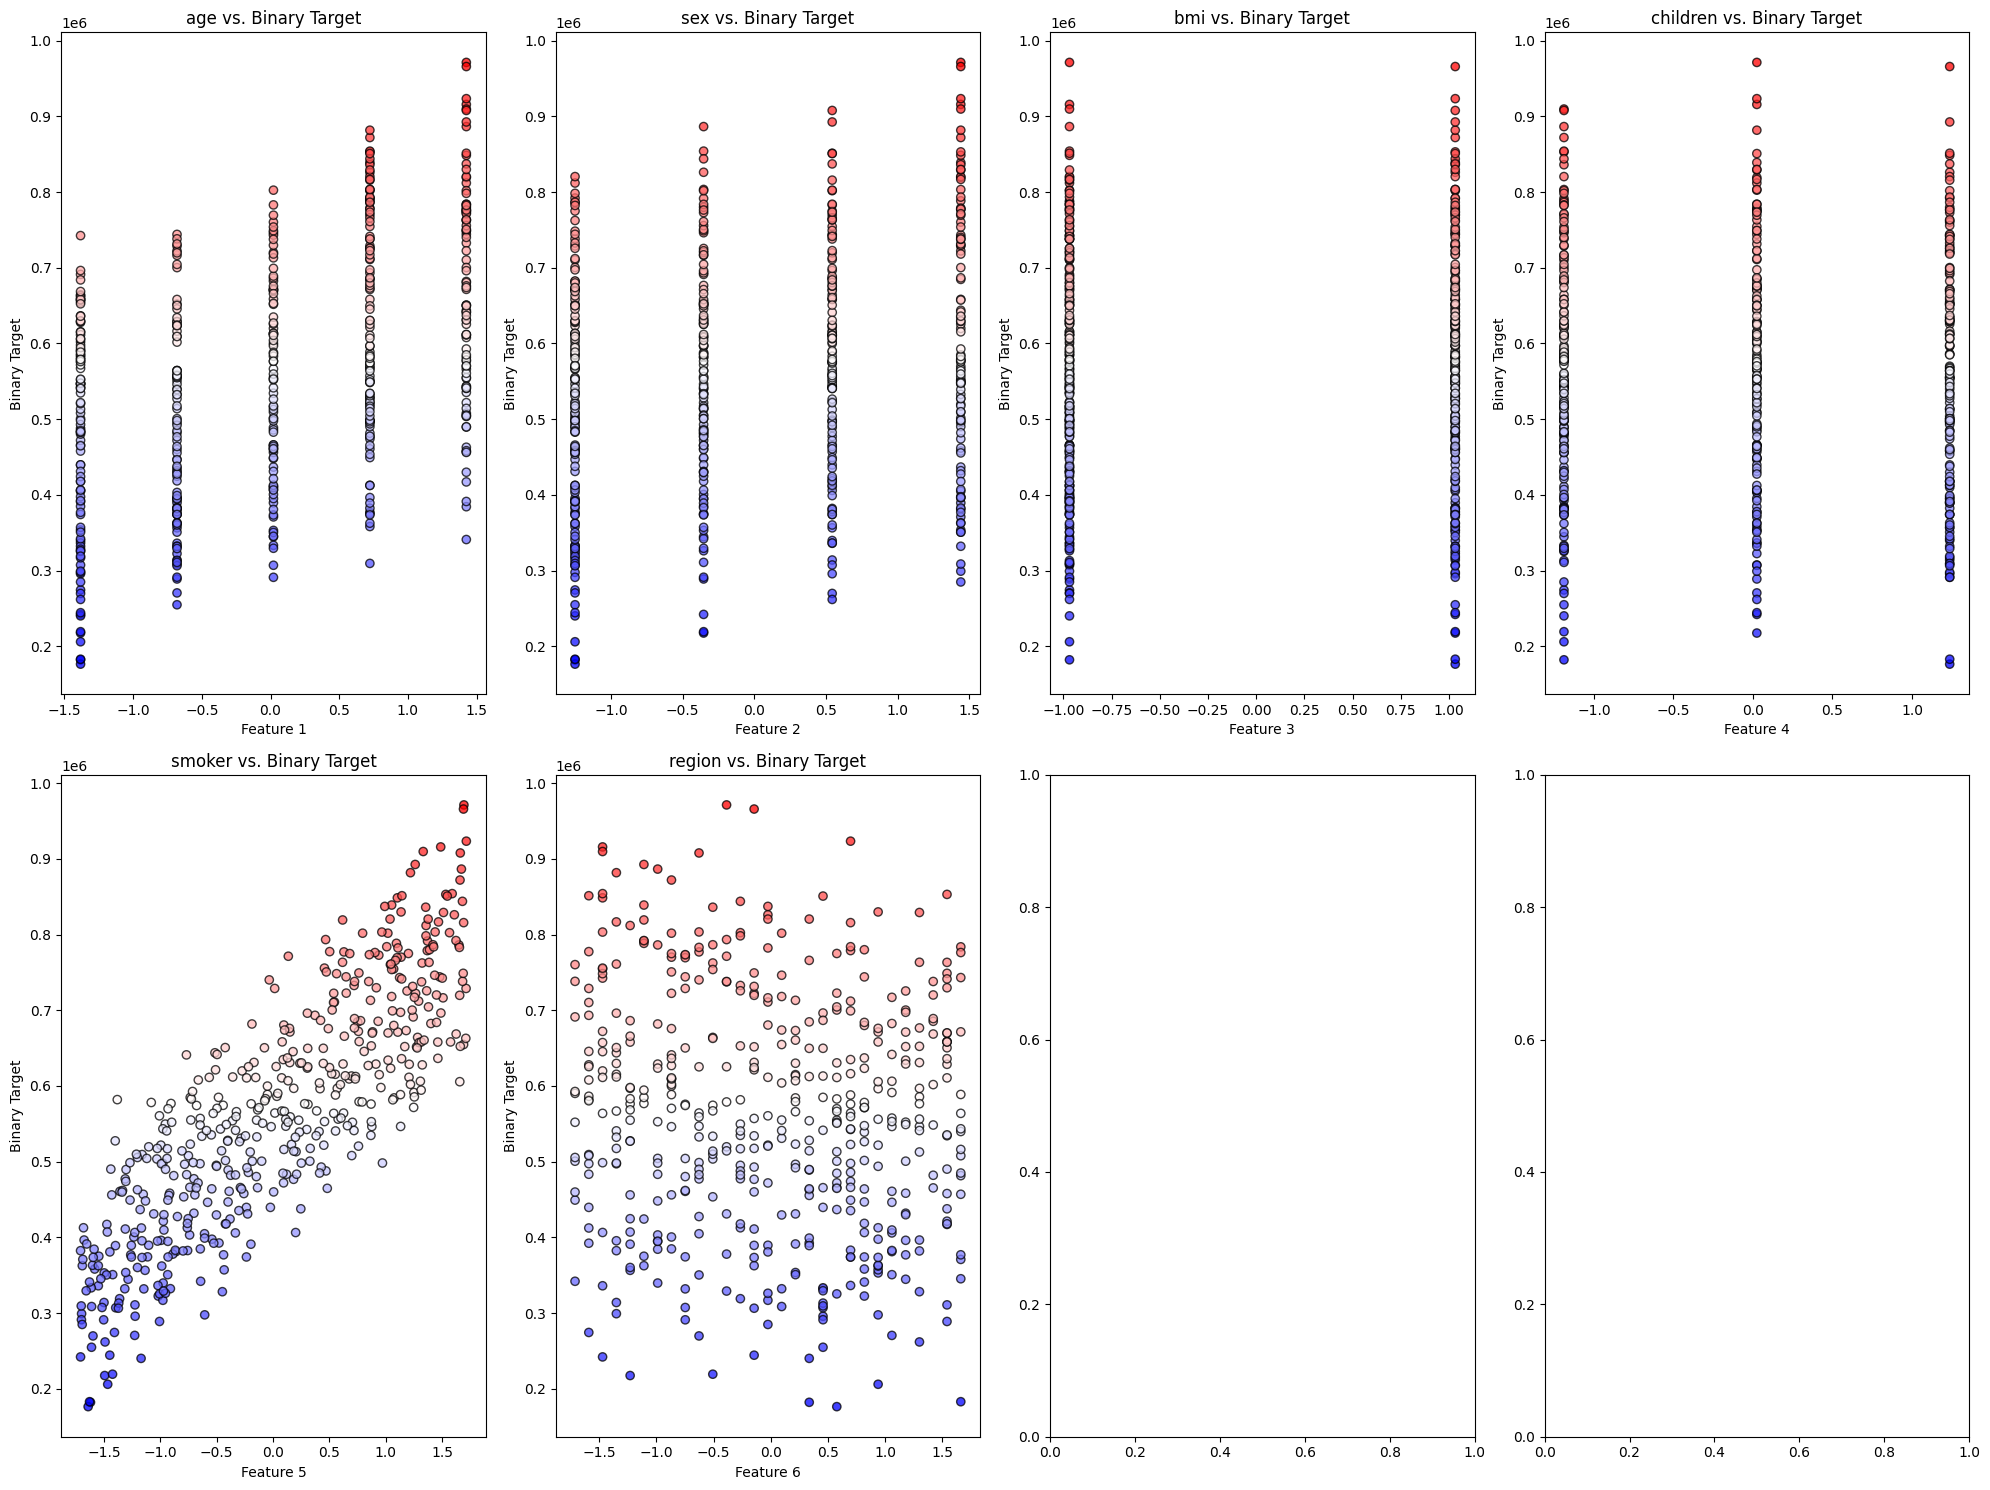

In [16]:
# Data visulation
# plotting each features against the output variable y
y = y.reshape(-1)

# list of feature names
features = ["age", "sex", "bmi", "children", "smoker", "region", "charges"]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 15))

# Plot each feature against the binary target
for k in range(6):  # We only have 8 subplots, adjust as necessary
    i = k // 4  # Row index
    j = k % 4   # Column index
    axes[i, j].scatter(x[:, k], y, c=y, cmap='bwr', alpha=0.75, edgecolor='k')
    axes[i, j].set_title(f'{features[k]} vs. Binary Target')
    axes[i, j].set_xlabel(f'Feature {k+1}')
    axes[i, j].set_ylabel('Binary Target')
# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

In [18]:
# view the training variable
print("Elements in X_train are:\n", x_train[:5])
print("Type of X_train:",type(x_train))

print("\n Elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

Elements in X_train are:
 [[-1.38297555 -1.25045608 -0.968496    0.0242607   1.21814001 -0.86781914
   0.968496  ]
 [-1.38297555 -1.25045608  1.03252879  1.23729565  1.62323941  1.4190829
   0.968496  ]
 [ 0.72307858 -1.25045608  1.03252879  1.23729565  1.41763236 -0.50672935
  -1.03252879]
 [ 0.72307858 -0.35342876  1.03252879  1.23729565  1.6071883  -0.02527629
   0.968496  ]
 [ 0.02106054  1.44062587  1.03252879 -1.18877425  0.91546197  1.53944616
  -1.03252879]]
Type of X_train: <class 'numpy.ndarray'>

 Elements in y_train are:
 [602167.46321827 668587.07227955 786454.56519889 826061.74869994
 729686.62427871]
Type of y_train: <class 'numpy.ndarray'>


In [19]:
# Check the dimensions of training variables
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (375, 7)
The shape of y_train is: (375,)
We have m = 375 training examples


In [20]:
# view the testing variables
print("Elements in x_test are:\n", x_test[:5])
print("Type of X_test:",type(x_test))

print("Elements in y_test are:\n", y_test[:5])
print("Type of Y_test:",type(y_test))

Elements in x_test are:
 [[ 1.42509663 -1.25045608  1.03252879 -1.18877425 -1.20251999  0.33581351
   0.968496  ]
 [-0.6809575  -0.35342876  1.03252879  1.23729565  0.80769024 -1.58999873
   0.968496  ]
 [-1.38297555  0.54359855  1.03252879  1.23729565 -0.38162045 -1.10854567
  -1.03252879]
 [ 1.42509663  0.54359855 -0.968496    0.0242607   0.14577311  0.93762984
   0.968496  ]
 [-1.38297555 -1.25045608  1.03252879 -1.18877425 -0.2256954   0.21545024
   0.968496  ]]
Type of X_test: <class 'numpy.ndarray'>
Elements in y_test are:
 [462958.72059773 645619.73813437 424272.9970963  676049.10304504
 431047.4178874 ]
Type of Y_test: <class 'numpy.ndarray'>


In [21]:
# Check the dimensions of testing variables
print ('The shape of X_test is: ' + str(x_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))
print ('We have m = %d testing examples' % (len(y_test)))

The shape of X_test is: (125, 7)
The shape of y_test is: (125,)
We have m = 125 testing examples


# **Model Training**

In [22]:
# Cost function for linear regression
def compute_cost(x, y, w, b): 
    
    # number of training examples
    m = x.shape[0] 

    total_cost = 0

    ### START CODE HERE ###
    cost=0
    for i in range(m):
        f_wb = w*x[i]+b
        cost += (f_wb - y[i])**2
    
    total_cost = cost/(2*m)
    
    ### END CODE HERE ### 

    return total_cost

In [23]:
# Gradient for linear regression
def compute_gradient(x, y, w, b): 

    # Number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ### 
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    dj_dw /= m
    dj_db /= m
    
    ### END CODE HERE ### 
    #print("dj_dw:=> ", dj_dw)
    #print("dj_db:=> ", dj_db)
    
    return dj_dw, dj_db

In [24]:
# Learning parameters using batch gradient descent
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):     
    # number of training examples
    m = len(x)
    #print("in gradient_descent")
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = 0
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  
        
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1][0]):8.2f}   ")
#     print(b,dj_db)
    return w, b, J_history, w_history #return w and J,w history for graphing

In [25]:
initial_w = np.zeros(x.shape[1])
initial_b = 0.

# some gradient descent settings
iterations = 7000
alpha = 0.001

w,b,_,_ = gradient_descent(x_train, y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 172752000388.24   
Iteration  700: Cost 49271847482.57   
Iteration 1400: Cost 19550714117.74   
Iteration 2100: Cost 12279868004.05   
Iteration 2800: Cost 10463491179.20   
Iteration 3500: Cost 9996254537.09   
Iteration 4200: Cost 9870883161.55   
Iteration 4900: Cost 9835190630.03   
Iteration 5600: Cost 9824226058.32   
Iteration 6300: Cost 9820559525.40   
w,b found by gradient descent: [ 71849.20409692  29911.04913974   9075.97671059  -4208.72162887
 131635.53836275 -16916.62033455   6265.19935254] 559041.8732761727


In [26]:
# m = x.shape[0]
# predicted = np.zeros(m)

# for i in range(m):
#     predicted[i] = np.dot(w, x[i]) + b


m = x_train.shape[0]
predicted =  np.zeros(m)

for i in range(m):
    predicted[i] = np.dot(w, x_train[i]) + b


# for val in predicted:
#     print(val)

In [27]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [28]:
mse = mean_squared_error(y_train, predicted)
rmse = root_mean_squared_error(y_train, predicted)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 578962055.67
Root Mean Squared Error (RMSE): 24061.63


In [29]:
m = x_test.shape[0]
predicted =  np.zeros(m)

for i in range(m):
    predicted[i] = np.dot(w, x_test[i]) + b

In [30]:
mse = mean_squared_error(y_test, predicted)
rmse = root_mean_squared_error(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 687383332.68
Root Mean Squared Error (RMSE): 26218.00


In [31]:
model = LinearRegression()

# X_train_new = X_train_new.reshape(-1, 1)
model.fit(x_train, y_train)

m = x_train.shape[0]
predicted = np.zeros(m)

# predicted = model.predict(X_test)

print(model.coef_)
print(model.intercept_)

[ 71692.94111677  30013.2019546    9090.69393648  -4207.37430854
 131657.44095363 -16949.78548963   6321.71824566]
559574.4220555862


In [32]:
predicted = model.predict(x_train)

# Calculate metrics
mse = mean_squared_error(y_train, predicted)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared Error: {rmse}")

Mean Squared Error: 578653306.0661863
Root mean Squared Error: 24055.21369820244


In [33]:
predicted = model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
# r2 = r2_score(Y_test, predicted)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared Error: {rmse}")
# print(f"R^2 Score: {r2}")

Mean Squared Error: 687044873.8943125
Root mean Squared Error: 26211.540853111106
